In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

In [2]:
from keras.datasets import mnist
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# First is to load & normalize the dataset
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (-1, 28, 28, 1))
X_test = np.reshape(X_test, (-1, 28, 28, 1))

In [4]:
# Second add Gaussian noise
X_train_noisy = np.clip(X_train + np.random.normal(0.0, 0.5, X_train.shape), 0., 1.)
X_test_noisy = np.clip(X_test + np.random.normal(0.0, 0.5, X_test.shape), 0., 1.)

In [5]:
# Third to have the convolutional autoencoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320  

In [6]:
# Then let's train autoencoder by 10 epoch
autoencoder.fit(X_train_noisy, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 30s 154ms/step - loss: 0.2474 - val_loss: 0.1413
Epoch 2/10
188/188 [==============================] - 29s 155ms/step - loss: 0.1320 - val_loss: 0.1269
Epoch 3/10
188/188 [==============================] - 29s 155ms/step - loss: 0.1225 - val_loss: 0.1212
Epoch 4/10
188/188 [==============================] - 29s 153ms/step - loss: 0.1179 - val_loss: 0.1166
Epoch 5/10
188/188 [==============================] - 30s 157ms/step - loss: 0.1148 - val_loss: 0.1150
Epoch 6/10
188/188 [==============================] - 29s 153ms/step - loss: 0.1126 - val_loss: 0.1130
Epoch 7/10
188/188 [==============================] - 29s 153ms/step - loss: 0.1109 - val_loss: 0.1106
Epoch 8/10
188/188 [==============================] - 29s 154ms/step - loss: 0.1094 - val_loss: 0.1093
Epoch 9/10
188/188 [==============================] - 29s 154ms/step - loss: 0.1082 - val_loss: 0.1082
Epoch 10/10
188/188 [==============================] - 29s 155ms/step - l

In [7]:
# The next step is to predict on noisy test
decoded_imgs = autoencoder.predict(X_test_noisy)

313/313 [==============================] - 2s 6ms/step


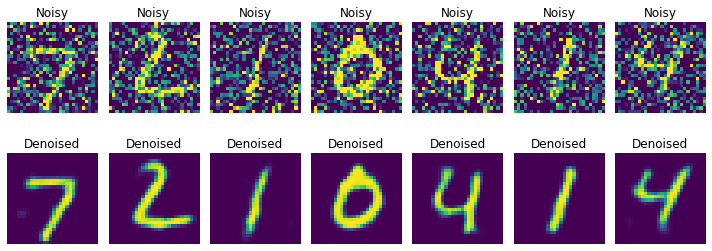

In [9]:
# Last is to show noisy denoised images
n = 7
plt.figure(figsize=(10, 4))
for i in range(n):
    # Noisy ones
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.title('Noisy')
    plt.axis('off')

    # Denoised ones
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title('Denoised')
    plt.axis('off')
plt.tight_layout()
plt.show()